<a href="https://colab.research.google.com/github/tmtakashi/RNN_practice/blob/master/LSTM_google_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset_train = pd.read_csv('drive/My Drive/Colab Notebooks/DeepLearningAtoZ/RNN/Google_Stock_Price_Train.csv')

In [0]:
training_set = dataset_train.iloc[:, 1:2].values # 1だけでなくて1:2で指定するとnumpy配列にしたときに２次元配列になる

In [0]:
training_set.shape

(1258, 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

training_set_scaled = sc.fit_transform(training_set)

In [0]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [0]:
X_train = []
y_train = []

for i in range(60, 1258):
  X_train.append(training_set_scaled[i - 60 : i, 0])
  y_train.append(training_set_scaled[i, 0])
  
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1) )

In [0]:
X_train.shape

(1198, 60, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))

regressor.add(Dense(1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=100, batch_size=32)

In [0]:
regressor_json = regressor.to_json()
with open("drive/My Drive/Colab Notebooks/DeepLearningAtoZ/RNN/regressor.json", "w") as json_file:
    json_file.write(regressor_json)

# モデルの重みを保存する
regressor.save_weights("drive/My Drive/Colab Notebooks/DeepLearningAtoZ/RNN/regressor.h5")

In [0]:
dataset_test = pd.read_csv('drive/My Drive/Colab Notebooks/DeepLearningAtoZ/RNN/Google_Stock_Price_Test.csv')
test_set = dataset_test.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)

inputs = sc.transform(inputs)

In [0]:
X_test = []

for i in range(60, 80):
  X_test.append(inputs[i - 60 : i, 0])
  
X_test = np.array(X_test)

In [0]:
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1) )

In [0]:
from keras.models import model_from_json

# モデルの構造を読む
json_file = open('drive/My Drive/Colab Notebooks/DeepLearningAtoZ/RNN/regressor.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
regressor = model_from_json(loaded_model_json)

# 重みを適用する
regressor.load_weights("drive/My Drive/Colab Notebooks/DeepLearningAtoZ/RNN/regressor.h5")

In [0]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [0]:
predicted_stock_price

array([[785.0482 ],
       [782.6046 ],
       [781.9378 ],
       [782.6123 ],
       [785.2449 ],
       [790.4154 ],
       [796.18994],
       [800.03436],
       [801.8099 ],
       [802.1628 ],
       [801.7743 ],
       [801.0389 ],
       [800.3006 ],
       [800.1746 ],
       [800.6823 ],
       [804.0617 ],
       [810.094  ],
       [817.56696],
       [823.3138 ],
       [822.7419 ]], dtype=float32)

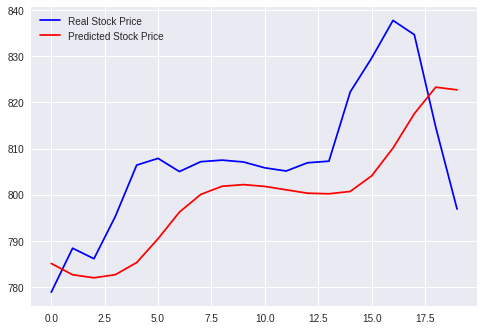

In [0]:
plt.plot(test_set, color='blue', label='Real Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.legend()
plt.show()